In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.daf.persistence as daf_persistence
import lsst.afw.geom as afwGeom
from lsst.afw.geom import Angle
import lsst.meas.algorithms as measAlg

In [2]:
from python.notebook_utils import look

In [3]:
sigma2fwhm = 2.*np.sqrt(2.*np.log(2.))

In [4]:
def getFwhmPix(psf):
    """Return the FWHM in pixels of a Psf.
    """
    sigPix = psf.computeShape().getDeterminantRadius()
    return sigPix*sigma2fwhm

In [5]:
output_directory = "/Users/sullivan/LSST/simulations/OpSim/pontus_2568/mosaic_42_varPSF_rand/"

In [6]:
repository_ref = output_directory + 'input_data/rerun/processed_data/rerun/seeing_dcr_1oldPSF/'

In [7]:
repository_new = output_directory + 'input_data/rerun/processed_data/rerun/seeing_dcr_1newPSF/'

In [41]:
repository_calc = output_directory + 'input_data/rerun/processed_data/rerun/seeing_dcr_1newPSF3/'

In [9]:
dataId = {'tract':0,'patch':'0,0','filter':'g'}

In [10]:
butler_ref = daf_persistence.Butler(repository_ref)

In [11]:
butler_new = daf_persistence.Butler(repository_new)

In [69]:
butler_calc = daf_persistence.Butler(repository_calc)

In [13]:
coadd_ref = butler_ref.get("deepCoadd", dataId=dataId)

In [14]:
coadd_new = butler_new.get("deepCoadd", dataId=dataId)

In [70]:
coadd_calc = butler_calc.get("deepCoadd", dataId=dataId)

In [71]:
dcrCoadd_calc = butler_calc.get("dcrCoadd", dataId={'tract':0,'patch':'0,0','filter':'g', 'subfilter':1, 'numSubfilters':3})

In [16]:
psf_ref = coadd_ref.getPsf()

In [17]:
getFwhmPix(psf_ref)

5.4330863053681515

In [18]:
psf_ref_shape = psf_ref.computeShape()

In [19]:
psf_ref_shape.getArea()

16.723517635614996

In [20]:
psf_new = coadd_new.getPsf()

In [28]:
getFwhmPix(psf_new)

5.362382263184024

In [21]:
psf_new_shape = psf_new.computeShape()
psf_new_shape.getArea()

16.291083304675073

In [22]:
psf_ref_shape

Quadrupole(ixx=5.1634432559107, iyy=5.488025384289241, ixy=-0.00018951149437431634)

In [23]:
psf_new_shape

Quadrupole(ixx=5.152064858403932, iyy=5.21937940064456, ixy=-0.0005736503158334035)

In [72]:
psf_calc = coadd_calc.getPsf()

In [73]:
getFwhmPix(psf_calc)

5.321144592429704

In [74]:
psf_dcr_calc = dcrCoadd_calc.getPsf()

In [75]:
getFwhmPix(psf_dcr_calc)

5.321144592429704

In [76]:
psf_calc_shape = psf_calc.computeShape()
psf_calc_shape.getArea()

16.041484099774593

In [77]:
psf_calc_shape

Quadrupole(ixx=5.117635183380327, iyy=5.094716595574647, ixy=0.0007353770140895894)

<IPython.core.display.Javascript object>


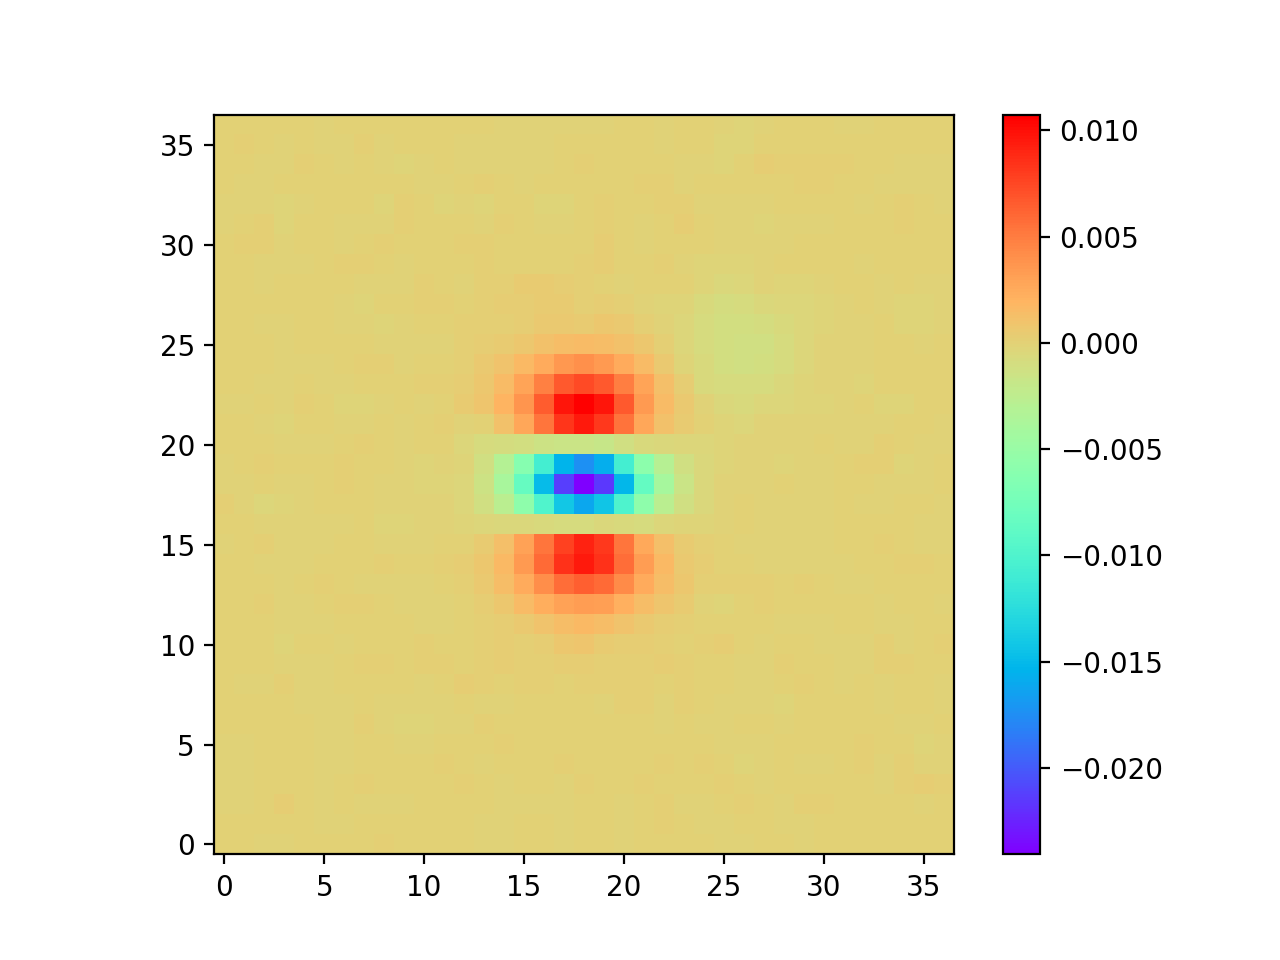

In [29]:
psf_diff_img = psf_ref.computeKernelImage().array - psf_new.computeKernelImage().array
psf_diff_img /= np.max(psf_ref.computeKernelImage().array)
look(psf_diff_img, window=1)

<IPython.core.display.Javascript object>


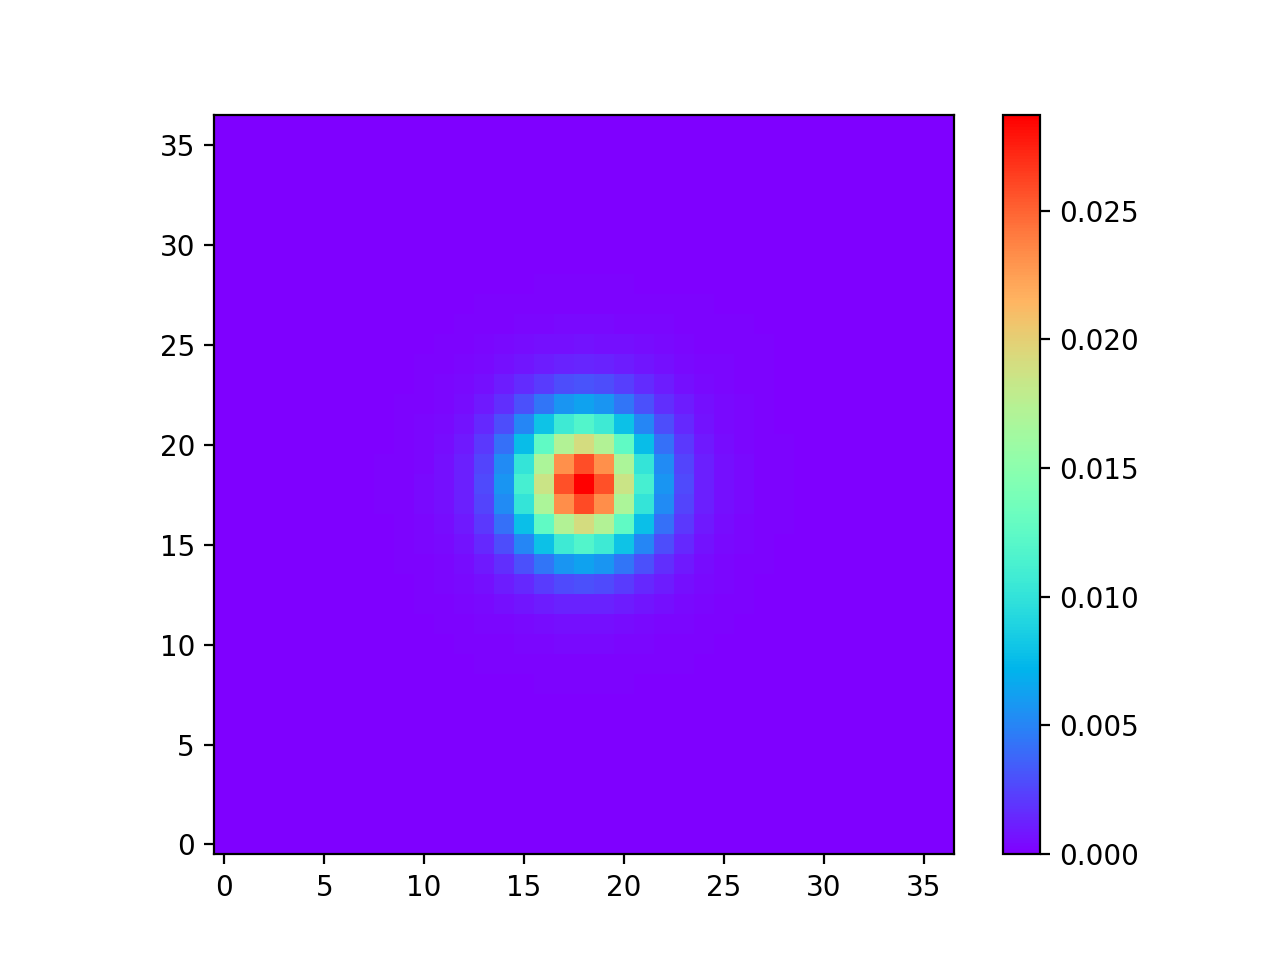

In [30]:
look(psf_ref.computeKernelImage().array, window=2)

<IPython.core.display.Javascript object>


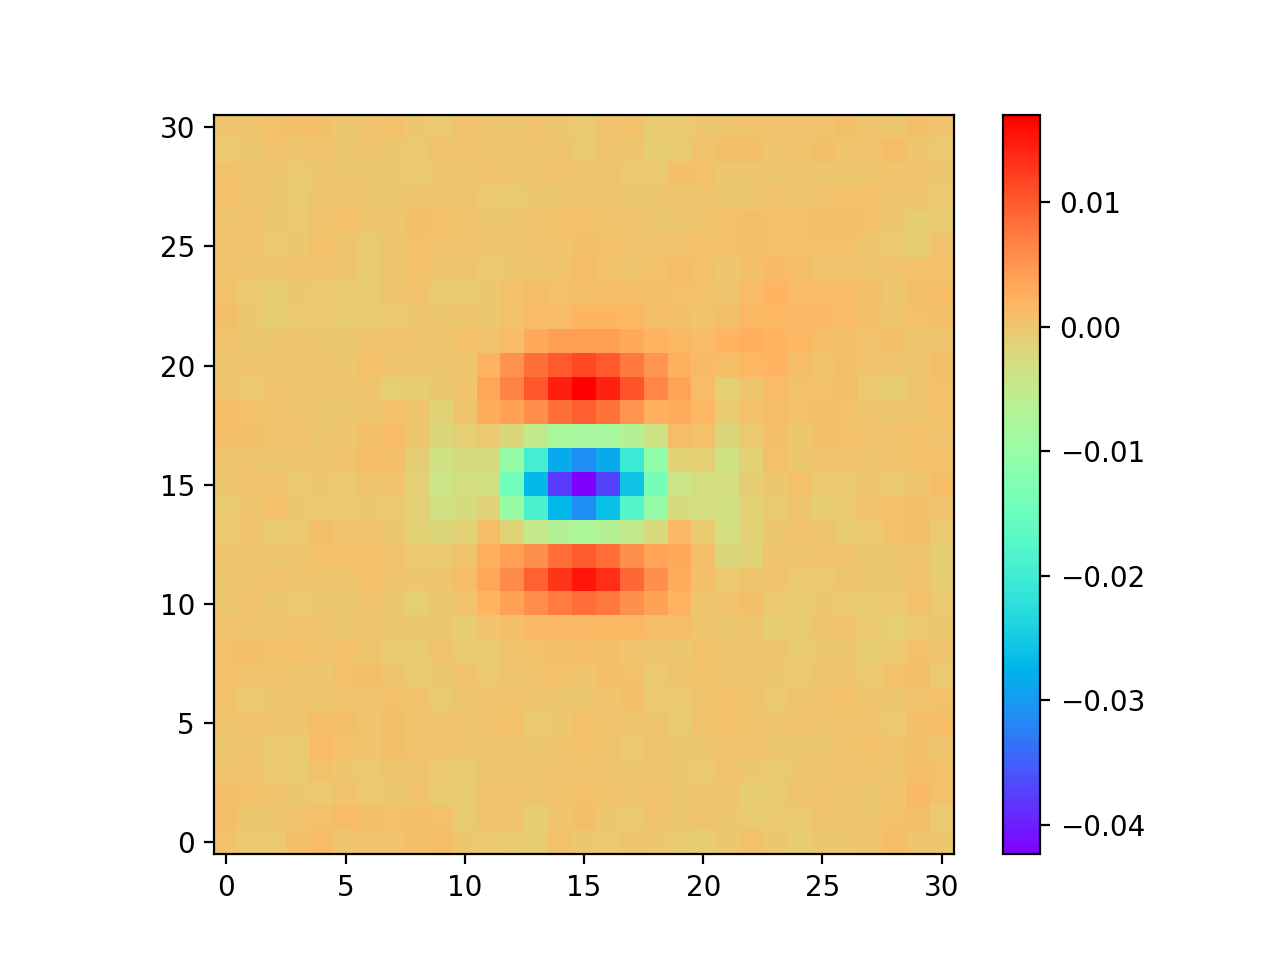

In [78]:
psf_diff_img2 = psf_ref.computeKernelImage().array[3:-3,3:-3] - psf_calc.computeKernelImage().array
psf_diff_img2 /= np.max(psf_ref.computeKernelImage().array)
look(psf_diff_img2, window=3)

<IPython.core.display.Javascript object>


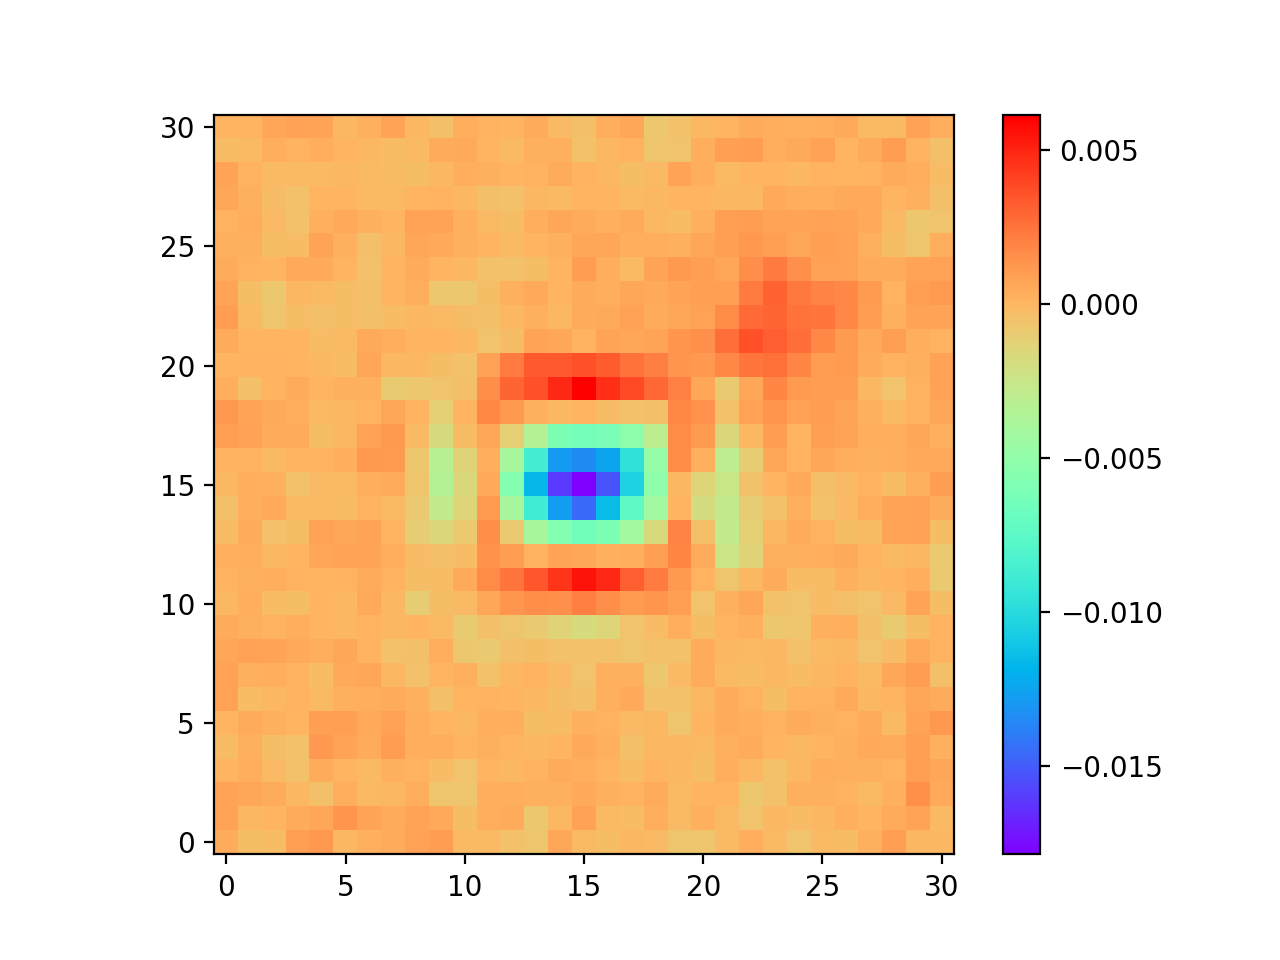

In [79]:
psf_diff_img3 = psf_new.computeKernelImage().array[3:-3,3:-3] - psf_calc.computeKernelImage().array
psf_diff_img3 /= np.max(psf_new.computeKernelImage().array)
look(psf_diff_img3, window=4)